In [1]:
import scanpy as sc
import singleCellHaystack as hs
import numpy as np

In [2]:
adata=sc.datasets.pbmc3k_processed()

In [3]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
adata_raw=adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

In [5]:
res1=hs.haystack(adata_raw, basis="umap")

> starting haystack ...
> scaling coordinates ...
> converting to dense array ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 13713/13713 [00:07<00:00, 1753.77it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.10it/s]


> calculating P values ...
> done.


In [6]:
exprs=adata_raw.X

In [7]:
exprs

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [8]:
coord=adata_raw.obsm["X_umap"]
coord

array([[ 1.35285574,  2.26612719],
       [-0.47802448,  7.87730423],
       [ 2.16588875, -0.24481226],
       ...,
       [ 0.34670979,  8.34967798],
       [ 0.19864146,  9.56698797],
       [ 2.62803322,  0.36722543]])

In [9]:
res2=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 13713/13713 [00:03<00:00, 4447.33it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.45it/s]


> calculating P values ...
> done.


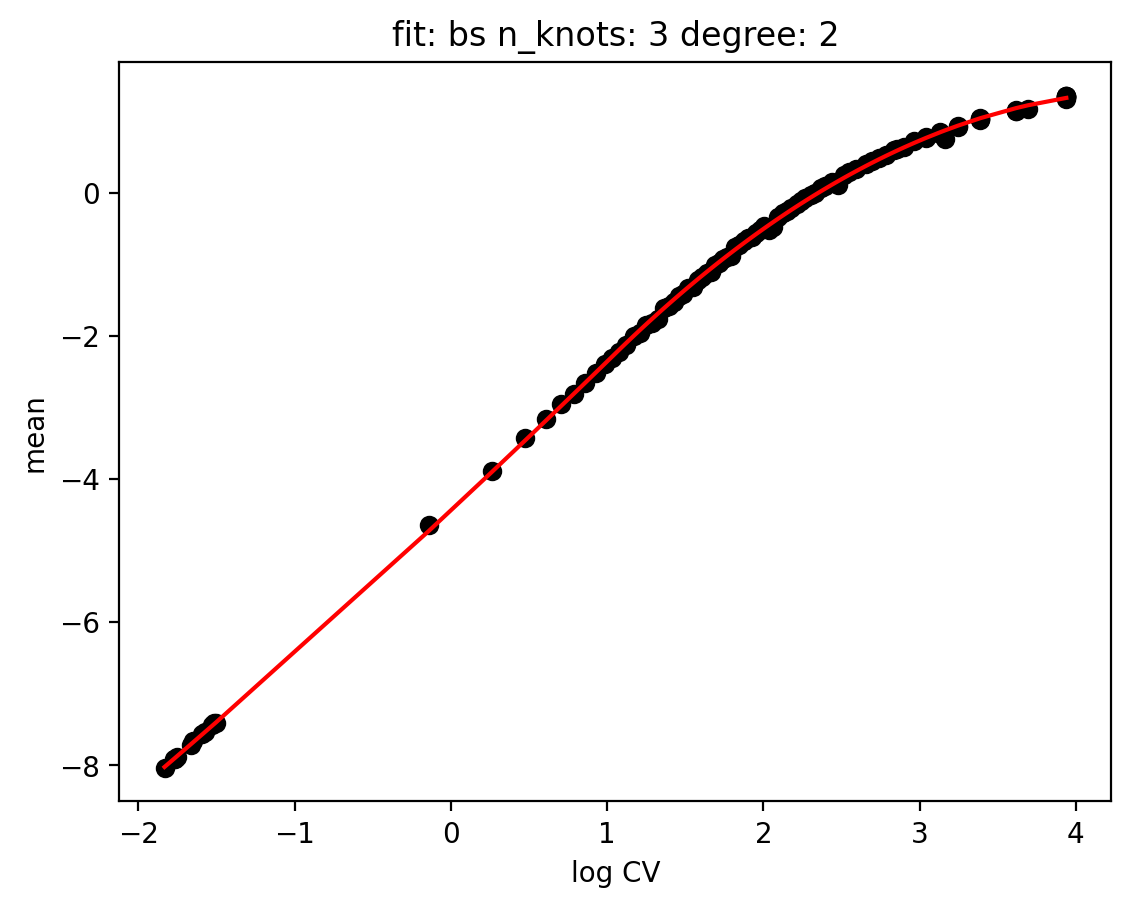

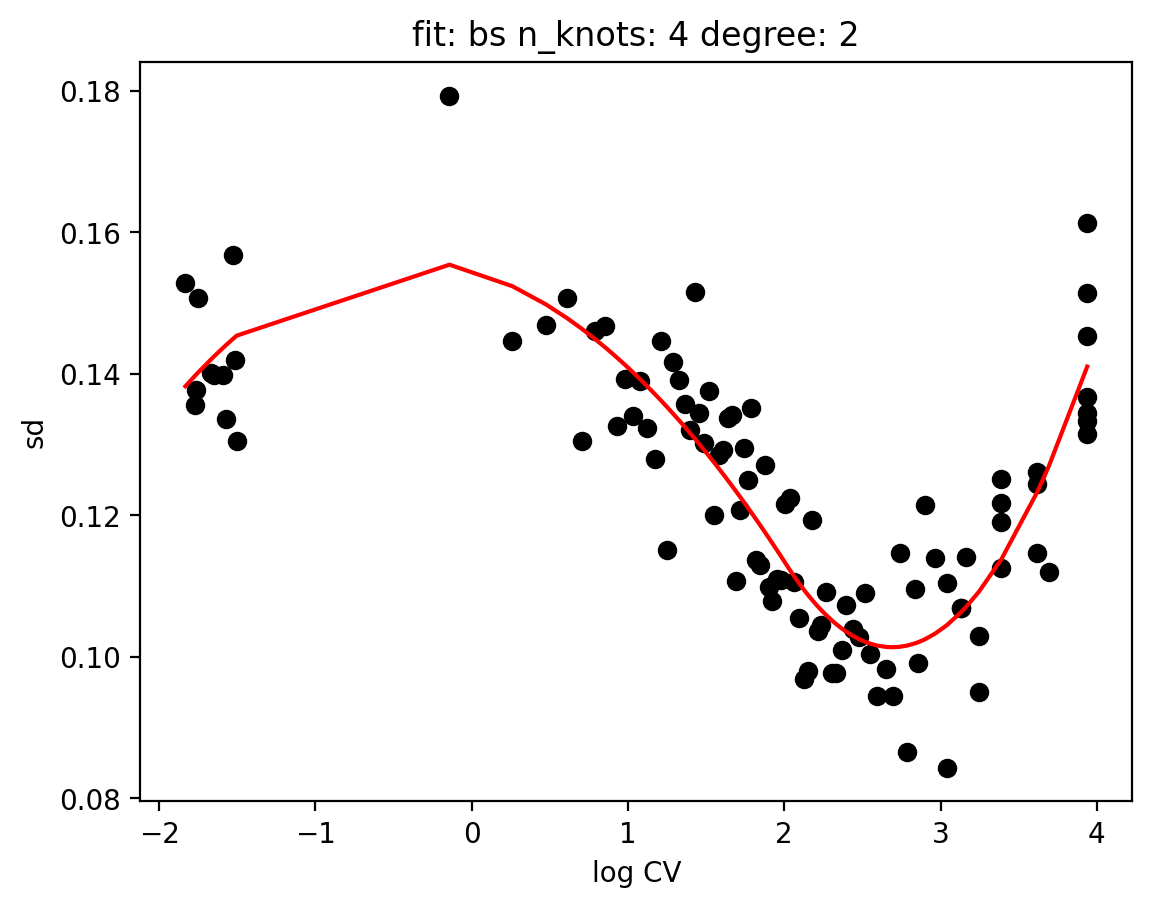

In [10]:
hs.plot_rand_fit(res1, "mean")
hs.plot_rand_fit(res1, "sd")

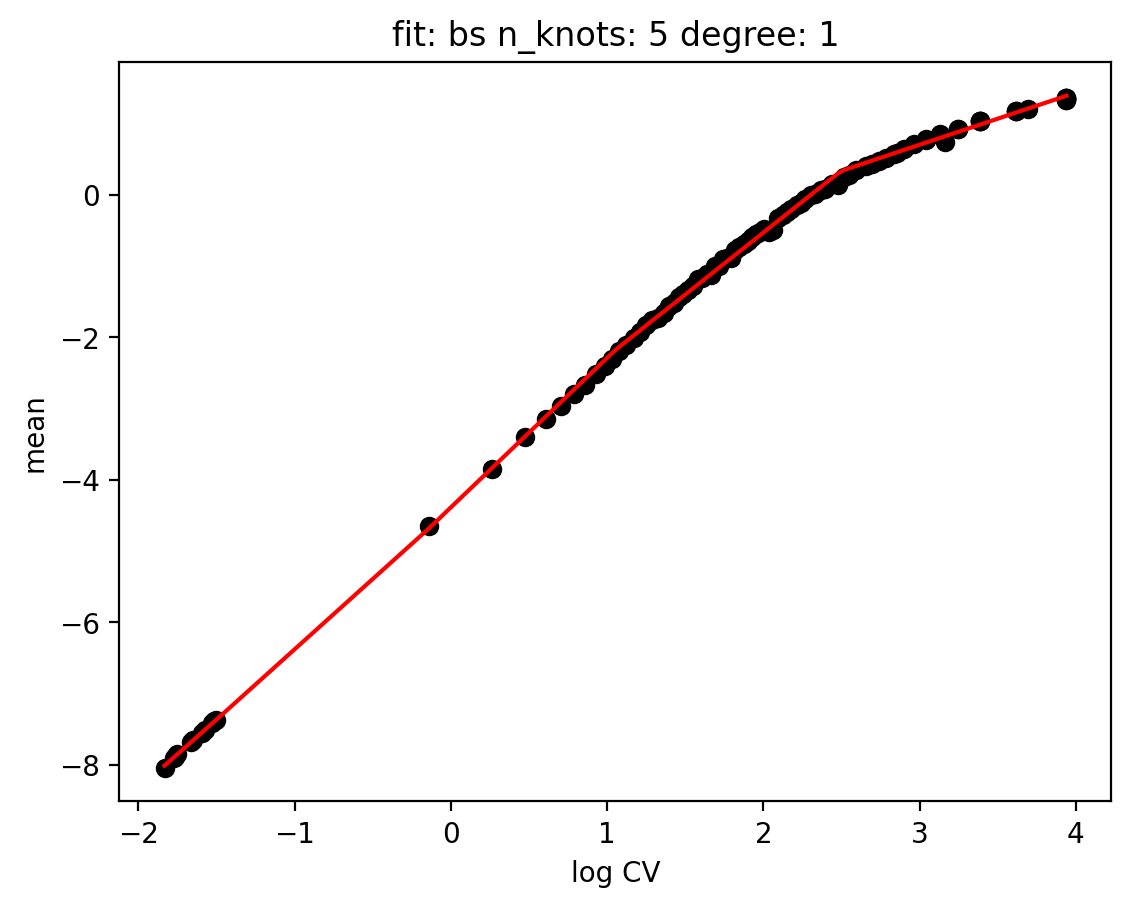

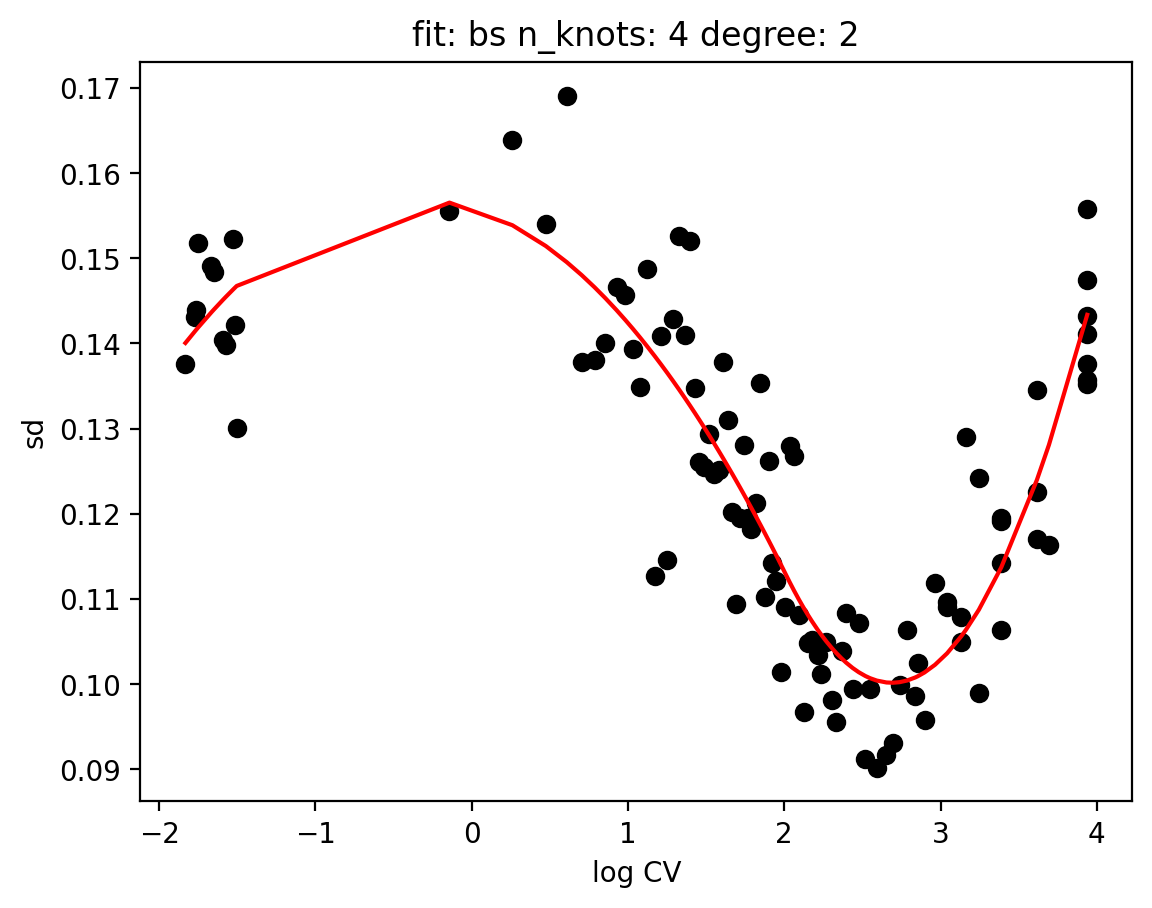

In [11]:
hs.plot_rand_fit(res2, "mean")
hs.plot_rand_fit(res2, "sd")

In [12]:
res1["results"]

,gene,KLD,pval,pval_adj,logpval,logpval_adj
7854,MALAT1,0.010058,1.257717e-120,1.724708e-116,-119.900417,-115.763284
12672,TYROBP,0.823764,4.377960e-120,6.003497e-116,-119.358728,-115.221596
4409,HLA-DRA,0.513787,2.450221e-114,3.359987e-110,-113.610795,-109.473662
11877,CST3,0.825466,4.030253e-114,5.526686e-110,-113.394668,-109.257535
1049,FCER1G,0.845228,2.039768e-111,2.797134e-107,-110.690419,-106.553287
...,...,...,...,...,...,...
3044,TBCCD1,0.381795,9.988825e-01,1.000000e+00,-0.000486,0.000000
1873,REV1,0.221938,9.991597e-01,1.000000e+00,-0.000365,0.000000
1682,FAM161A,1.441501,9.993086e-01,1.000000e+00,-0.000300,0.000000
12907,DHX34,0.760639,9.994883e-01,1.000000e+00,-0.000222,0.000000


In [13]:
res2["results"]

,KLD,pval,pval_adj,logpval,logpval_adj
7854,0.009860,3.258313e-115,4.468125e-111,-114.487007,-110.349875
12672,0.846169,5.578590e-115,7.649921e-111,-114.253476,-110.116343
4409,0.502929,2.864251e-107,3.927747e-103,-106.542989,-102.405856
11877,0.823170,3.185176e-107,4.367831e-103,-106.496867,-102.359734
1049,0.872720,9.973632e-107,1.367684e-102,-106.001147,-101.864014
...,...,...,...,...,...
8442,0.890785,9.999219e-01,1.000000e+00,-0.000034,0.000000
11101,0.846841,9.999344e-01,1.000000e+00,-0.000029,0.000000
9512,0.944011,9.999770e-01,1.000000e+00,-0.000010,0.000000
6224,0.896047,9.999877e-01,1.000000e+00,-0.000005,0.000000


In [14]:
sum1 = res1["results"]
sum1

,gene,KLD,pval,pval_adj,logpval,logpval_adj
7854,MALAT1,0.010058,1.257717e-120,1.724708e-116,-119.900417,-115.763284
12672,TYROBP,0.823764,4.377960e-120,6.003497e-116,-119.358728,-115.221596
4409,HLA-DRA,0.513787,2.450221e-114,3.359987e-110,-113.610795,-109.473662
11877,CST3,0.825466,4.030253e-114,5.526686e-110,-113.394668,-109.257535
1049,FCER1G,0.845228,2.039768e-111,2.797134e-107,-110.690419,-106.553287
...,...,...,...,...,...,...
3044,TBCCD1,0.381795,9.988825e-01,1.000000e+00,-0.000486,0.000000
1873,REV1,0.221938,9.991597e-01,1.000000e+00,-0.000365,0.000000
1682,FAM161A,1.441501,9.993086e-01,1.000000e+00,-0.000300,0.000000
12907,DHX34,0.760639,9.994883e-01,1.000000e+00,-0.000222,0.000000


In [15]:
sum2 = res2["results"]
sum2

,KLD,pval,pval_adj,logpval,logpval_adj
7854,0.009860,3.258313e-115,4.468125e-111,-114.487007,-110.349875
12672,0.846169,5.578590e-115,7.649921e-111,-114.253476,-110.116343
4409,0.502929,2.864251e-107,3.927747e-103,-106.542989,-102.405856
11877,0.823170,3.185176e-107,4.367831e-103,-106.496867,-102.359734
1049,0.872720,9.973632e-107,1.367684e-102,-106.001147,-101.864014
...,...,...,...,...,...
8442,0.890785,9.999219e-01,1.000000e+00,-0.000034,0.000000
11101,0.846841,9.999344e-01,1.000000e+00,-0.000029,0.000000
9512,0.944011,9.999770e-01,1.000000e+00,-0.000010,0.000000
6224,0.896047,9.999877e-01,1.000000e+00,-0.000005,0.000000


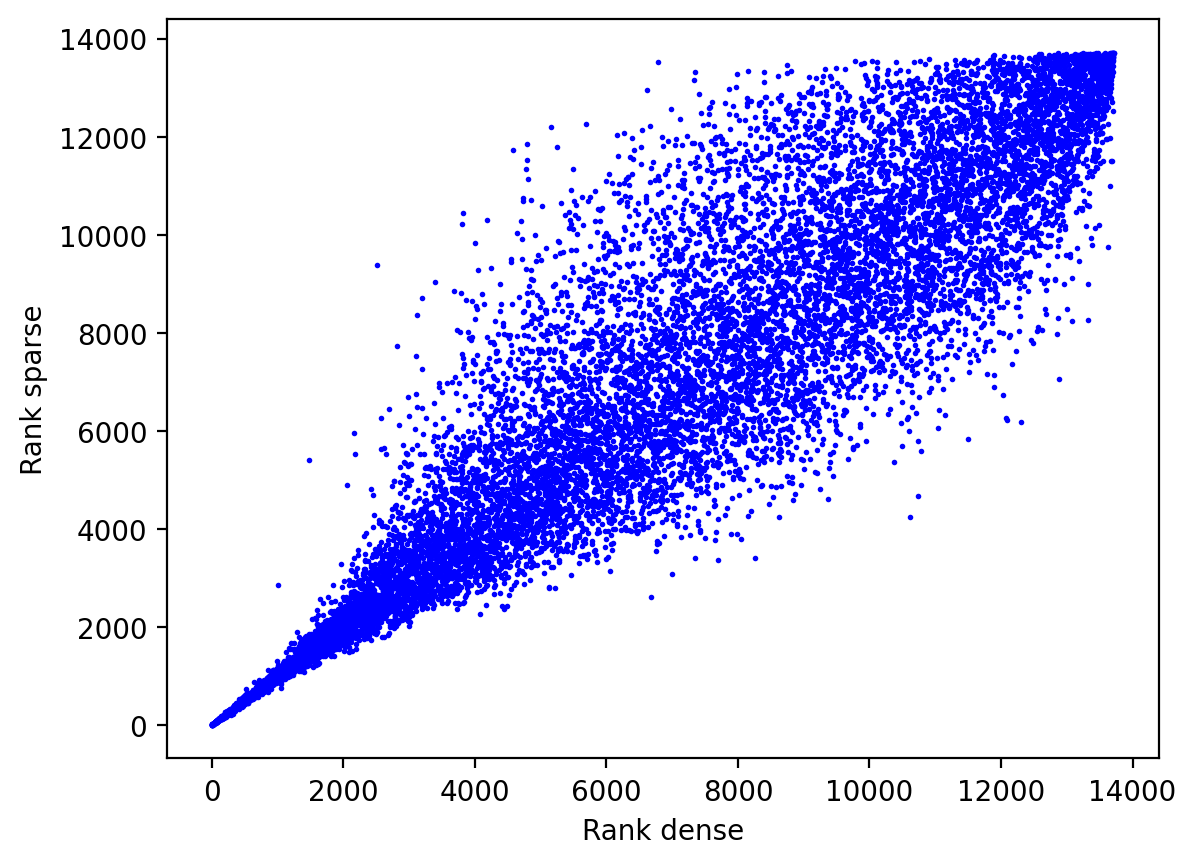

In [16]:
hs.plot_compare_ranks(res1, res2, sort_by="logpval", xlabel="Rank dense", ylabel="Rank sparse")

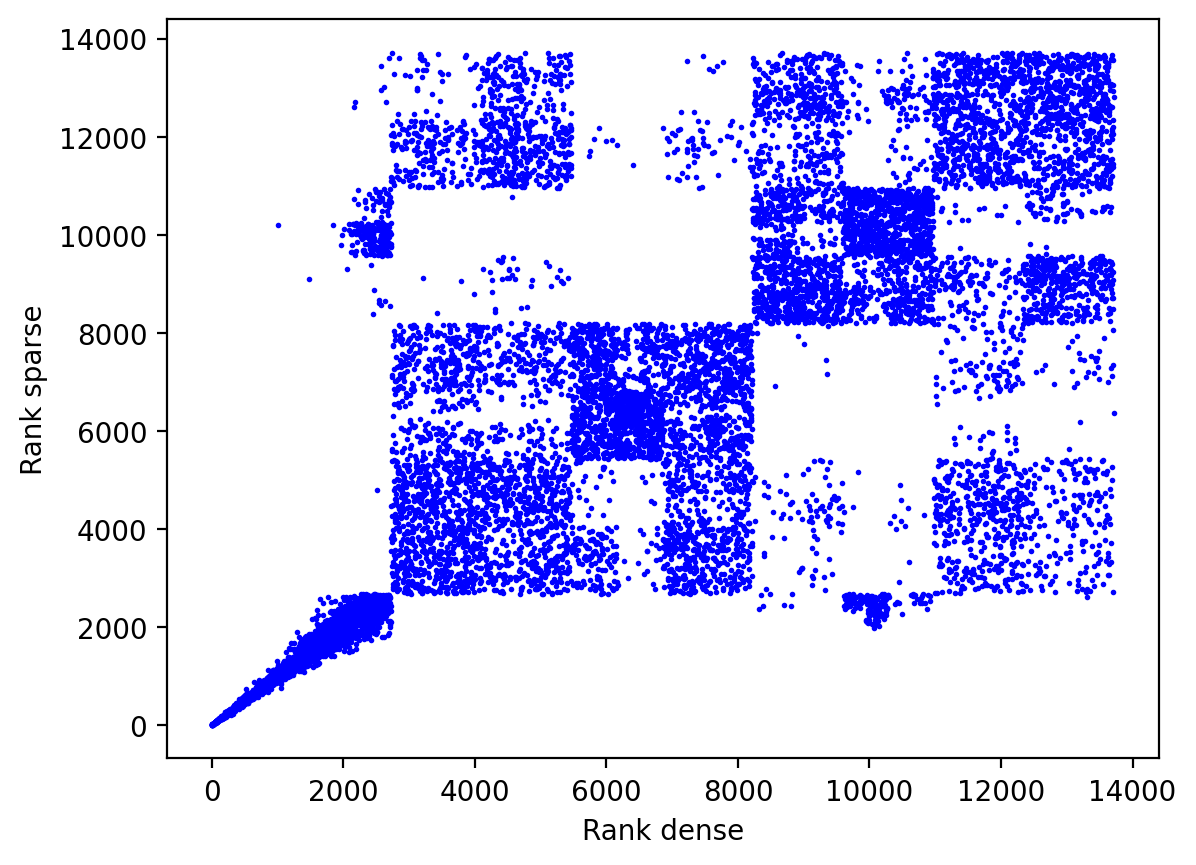

In [17]:
hs.plot_compare_ranks(res1, res2, sort_by="logpval_adj", xlabel="Rank dense", ylabel="Rank sparse")

In [25]:
np.random.seed(1)
res3=hs.haystack(adata_raw, basis="umap")

> starting haystack ...
> scaling coordinates ...
> converting to dense array ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 13713/13713 [00:07<00:00, 1864.93it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.13it/s]


> calculating P values ...
> done.


In [26]:
np.random.seed(1)
res4=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 13713/13713 [00:03<00:00, 4489.57it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.48it/s]


> calculating P values ...
> done.


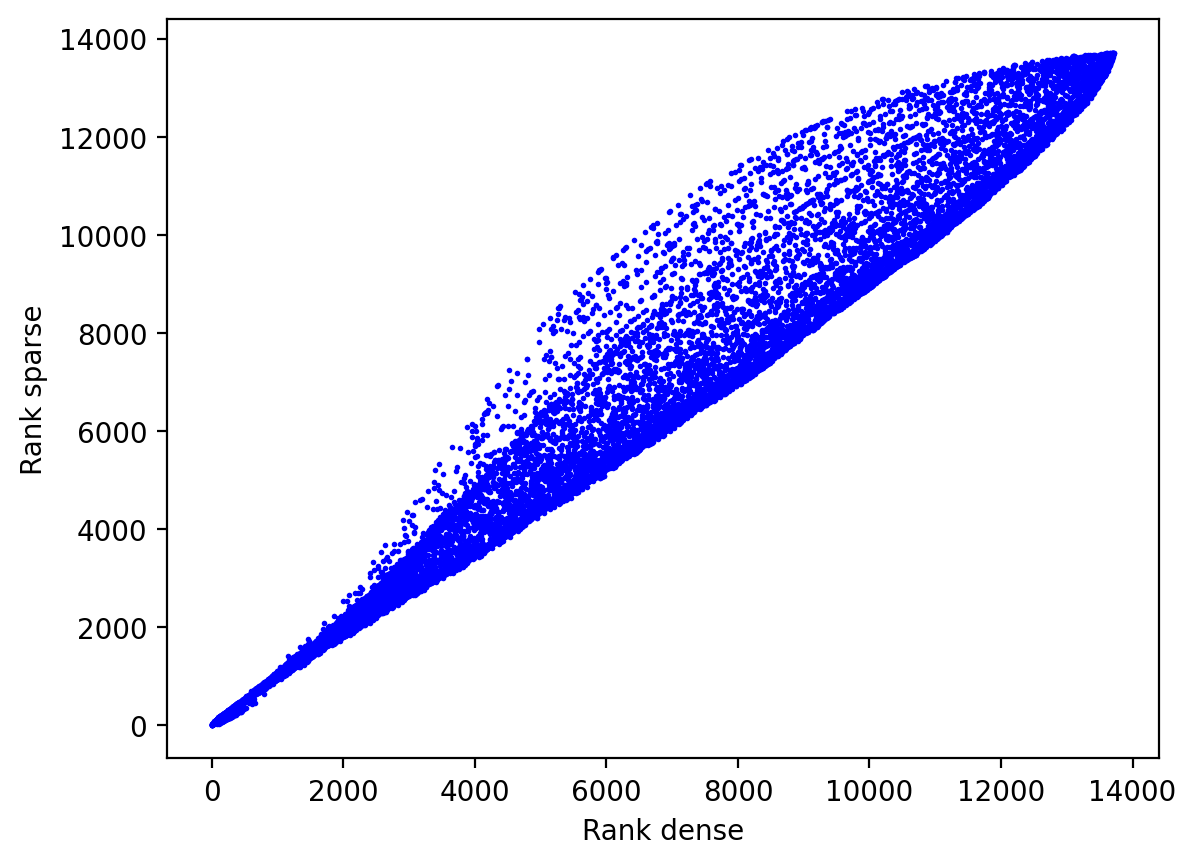

In [28]:
hs.plot_compare_ranks(res3, res4, "logpval", "Rank dense", "Rank sparse")

In [29]:
np.random.seed(1)
res5=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 13713/13713 [00:02<00:00, 4701.58it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.99it/s]


> calculating P values ...
> done.


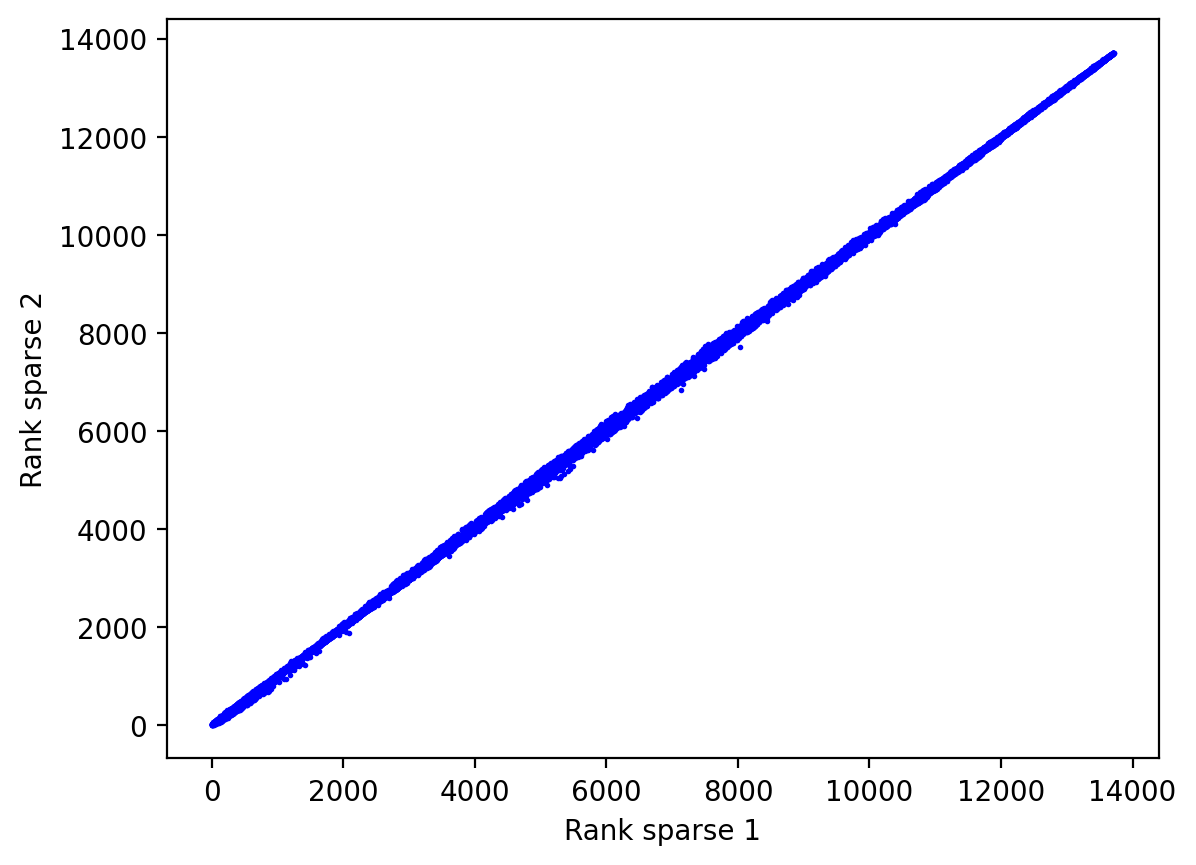

In [30]:
hs.plot_compare_ranks(res4, res5, "logpval", "Rank sparse 1", "Rank sparse 2")